In [17]:
import numpy as np
import pandas as pd
import lightgbm as lgb

from data import read_data
from fe import preprocess, create_features
from utils import PurgedGroupTimeSeriesSplit

file_paths = {
    'price': '../input/jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv',
    'list': '../input/jpx-tokyo-stock-exchange-prediction/stock_list.csv',
    'financial': '../input/jpx-tokyo-stock-exchange-prediction/train_files/financials.csv'
}

dfs = create_features(
    preprocess(read_data(file_paths))
)

df = dfs['price'].merge(dfs['financial'], on=['SecuritiesCode', 'CurrentPeriodEndDate'], how='left')

/Users/tianjia.a.ni/workspace/jpx/src/data.py:15: DtypeWarning: Columns (14,15,16,17,18,19,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[name] = pd.read_csv(path)


In [ ]:
'DisclosedUnixTime', 

In [140]:
df.dtypes.to_dict()

{'RowId': dtype('O'),
 'Date': dtype('<M8[ns]'),
 'SecuritiesCode': dtype('int64'),
 'Open': dtype('float64'),
 'High': dtype('float64'),
 'Low': dtype('float64'),
 'Close': dtype('float64'),
 'Volume': dtype('int64'),
 'AdjustmentFactor': dtype('float64'),
 'ExpectedDividend': dtype('float64'),
 'SupervisionFlag': dtype('bool'),
 'Target': dtype('float64'),
 'diff_high_low': dtype('float16'),
 'feat_pct20_Close': dtype('float16'),
 'feat_vl20_Close': dtype('float16'),
 'feat_rmr20_Close': dtype('float16'),
 'feat_wd20': dtype('float16'),
 'feat_pct40_Close': dtype('float16'),
 'feat_vl40_Close': dtype('float16'),
 'feat_rmr40_Close': dtype('float16'),
 'feat_wd40': dtype('float16'),
 'feat_pct60_Close': dtype('float16'),
 'feat_vl60_Close': dtype('float16'),
 'feat_rmr60_Close': dtype('float16'),
 'feat_wd60': dtype('float16'),
 'feat_pct120_Close': dtype('float16'),
 'feat_vl120_Close': dtype('float16'),
 'feat_rmr120_Close': dtype('float16'),
 'feat_wd120': dtype('float16'),
 'Cumul

In [134]:
df.dropna(subset='Target', how='any')

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,...,feat_ratio_diff_OperatingProfit,feat_ratio_diff_OrdinaryProfit,feat_ratio_ma_NetSales,feat_ratio_ma_Profit,feat_ratio_ma_OperatingProfit,feat_ratio_ma_OrdinaryProfit,feat_ratio_NetSales,feat_ratio_Profit,feat_ratio_OperatingProfit,feat_ratio_OrdinaryProfit
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301298,20190327_9997,2019-03-27,9997,892.0,897.0,883.0,887.0,180000,1.0,0.0,...,-0.030361,1.328871,0.098810,0.070150,-0.077106,0.155571,-1.000000,-1.000000,-1.000000,-1.00000
1301301,20190328_9997,2019-03-28,9997,876.0,877.0,850.0,853.0,265500,1.0,0.0,...,-0.030361,1.328871,0.098810,0.070150,-0.077106,0.155571,-1.000000,-1.000000,-1.000000,-1.00000
1301304,20190329_9997,2019-03-29,9997,857.0,872.0,853.0,858.0,289400,1.0,0.0,...,-0.030361,1.328871,0.098810,0.070150,-0.077106,0.155571,-1.000000,-1.000000,-1.000000,-1.00000
1301307,20190401_9997,2019-04-01,9997,867.0,883.0,855.0,863.0,408800,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df.isin([np.inf, -np.inf])

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,...,feat_ratio_diff_OperatingProfit,feat_ratio_diff_OrdinaryProfit,feat_ratio_ma_NetSales,feat_ratio_ma_Profit,feat_ratio_ma_OperatingProfit,feat_ratio_ma_OrdinaryProfit,feat_ratio_NetSales,feat_ratio_Profit,feat_ratio_OperatingProfit,feat_ratio_OrdinaryProfit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301298,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1301301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1301304,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1301307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [137]:
# date_col = ['Date', ]
dfn = df.drop([col for col in df.columns if df[col].dtype=='object'], axis=1)


In [138]:
list(dfn.columns)

['Date',
 'SecuritiesCode',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'AdjustmentFactor',
 'ExpectedDividend',
 'SupervisionFlag',
 'Target',
 'diff_high_low',
 'feat_pct20_Close',
 'feat_vl20_Close',
 'feat_rmr20_Close',
 'feat_wd20',
 'feat_pct40_Close',
 'feat_vl40_Close',
 'feat_rmr40_Close',
 'feat_wd40',
 'feat_pct60_Close',
 'feat_vl60_Close',
 'feat_rmr60_Close',
 'feat_wd60',
 'feat_pct120_Close',
 'feat_vl120_Close',
 'feat_rmr120_Close',
 'feat_wd120',
 'CumulativeAdjustmentFactor',
 'AdjustedClose',
 'CurrentPeriodEndDate',
 'DisclosureNumber',
 'DisclosedUnixTime',
 'NetSales',
 'OperatingProfit',
 'OrdinaryProfit',
 'Profit',
 'EarningsPerShare',
 'TotalAssets',
 'Equity',
 'EquityToAssetRatio',
 'BookValuePerShare',
 'ResultDividendPerShare1stQuarter',
 'ResultDividendPerShare2ndQuarter',
 'ResultDividendPerShare3rdQuarter',
 'ResultDividendPerShareFiscalYearEnd',
 'ResultDividendPerShareAnnual',
 'ForecastDividendPerShare1stQuarter',
 'ForecastDividendPerShare2ndQ

In [68]:
df = df.drop_duplicates(subset=['RowId'], keep='first')

In [69]:
df = df.drop('Date_y', axis=1).rename(columns={'Date_x': 'Date'})

<AxesSubplot:title={'center':'PurgedGroupTimeSeriesSplit'}, xlabel='Sample index', ylabel='CV iteration'>

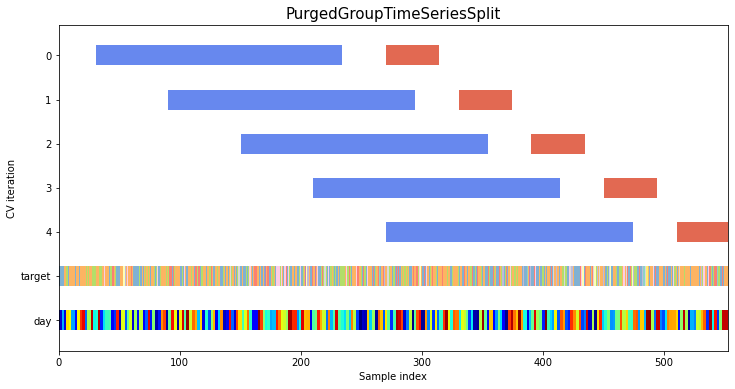

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

FOLDS = 5
GROUP_GAP = 20
MAX_TEST_GROUP_SIZE = 60
MAX_TRAIN_GROUP_SIZE = 200

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    cmap_cv = plt.cm.coolwarm
    jet = plt.cm.get_cmap('jet', 256)
    seq = np.linspace(0, 1, 256)
    _ = np.random.shuffle(seq)   # inplace
    cmap_data = ListedColormap(jet(seq))    
    for ii, (tr, tt) in enumerate(list(cv.split(X=X, y=y, groups=group))):
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0
        ax.scatter(range(len(indices)), [ii + .5] * len(indices), c=indices, marker='_', lw=lw, cmap=cmap_cv, vmin=-.2, vmax=1.2)
    ax.scatter(range(len(X)), [ii + 1.5] * len(X), c=y, marker='_', lw=lw, cmap=plt.cm.Set3)
    ax.scatter(range(len(X)), [ii + 2.5] * len(X), c=group, marker='_', lw=lw, cmap=cmap_data)
    yticklabels = list(range(n_splits)) + ['target', 'day']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels, xlabel='Sample index', ylabel="CV iteration", ylim=[n_splits+2.2, -.2], xlim=[0, len(y)])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

asset_id = 1301
dfd = df[df.SecuritiesCode == 1301].reset_index(drop=True)
y = dfd.Target
X = dfd.drop(['SecuritiesCode', 'Target'], axis=1)
groups = pd.factorize(X['Date'].dt.day.astype(str) + '_' + X['Date'].dt.month.astype(str) + '_' + X['Date'].dt.year.astype(str))[0]
X = X.drop(columns = 'Date')

fig, ax = plt.subplots(figsize = (12, 6))
cv = PurgedGroupTimeSeriesSplit(n_splits = FOLDS, group_gap = GROUP_GAP, max_train_group_size=MAX_TRAIN_GROUP_SIZE, max_test_group_size=MAX_TEST_GROUP_SIZE)
plot_cv_indices(cv, X, y, groups, ax, FOLDS, lw=20)

In [14]:
df = df.drop('Date_y', axis=1).rename(columns={'Date_x': 'Date'}, )

In [162]:
import optuna

study_name = "jpx-study"  # Unique identifier of the study.
storage_name = "sqlite:///../{}.db".format(study_name)
study = optuna.create_study(study_name=study_name, storage=storage_name, load_if_exists=True)
df = study.trials_dataframe(attrs=("number", "value", "params", "state"))

[I 2022-05-27 16:03:27,719] Using an existing study with name 'jpx-study' instead of creating a new one.


In [163]:
df.sort_values('value', ascending=False)

,number,value,params_colsample_bytree,params_lambda,params_max_bin,params_max_depth,params_subsample,state
2,2,0.256553,0.474667,1.943800,135,6,0.468759,COMPLETE
1,1,0.246951,0.448444,1.201856,179,9,0.585213,COMPLETE
3,3,0.242190,0.563996,1.006384,140,6,0.753944,COMPLETE
6,6,0.240648,0.485867,1.512758,236,6,0.539811,COMPLETE
10,10,0.233809,0.738901,1.806237,245,9,0.734301,COMPLETE
4,4,0.233768,0.620206,1.836805,141,6,0.536517,COMPLETE
5,5,0.228711,0.718581,1.147099,231,8,0.650455,COMPLETE
13,13,0.225049,0.671499,1.702216,217,7,0.402340,COMPLETE
14,14,0.223188,0.784718,1.989670,180,8,0.479009,COMPLETE
7,7,0.221651,0.543533,1.550799,206,9,0.773015,COMPLETE
